In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from ControlRF.train import *
from ControlRF.viz.episodic_plot import *
from ControlRF.viz.animate import *
from ControlRF.viz.plot import *
from ControlRF.util import *
from core.systems import DoubleInvertedPendulum
import sys
import mosek
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
# import importlib
# importlib.reload(sys.modules[animate.__module__])

In [2]:
system = DoubleInvertedPendulum(1, 1, .8, .8)
system_est = DoubleInvertedPendulum(1.5, 2, 1, 1)
system.l_1=1
system.l_2=1

In [3]:
Q, R = 10 * np.identity(4), np.identity(2)
system_est.lyap = AffineQuadCLF.build_care(system_est, Q, R)
system_est.alpha = min(la.eigvalsh(Q)) / max(la.eigvalsh(system_est.lyap.P))

model_lqr = LQRController.build(system_est, Q, R)
system_est.fb_lin = FBLinController(system_est, model_lqr)

system.qp_controller = QPController.build_care(system_est, Q, R)
system.qp_controller.add_regularizer(system_est.fb_lin, 16)
system.qp_controller.add_static_cost(100 * np.identity(2))
system.qp_controller.add_stability_constraint(
    system_est.lyap, comp=lambda r: system_est.alpha * r, slacked=True, coeff=1e6
)

system.lyap = AffineQuadCLF.build_care(system, Q, R)
system.alpha = min(la.eigvalsh(Q)) / max(la.eigvalsh(system.lyap.P))
lqr = LQRController.build(system, Q, R)
system.fb_lin = FBLinController(system, lqr)
system.oracle_controller = QPController.build_care(system, Q, R)
system.oracle_controller.add_regularizer(system.fb_lin, 16)
# system.oracle_controller.add_static_cost(100* np.identity(2))
system.oracle_controller.add_stability_constraint(
    system.lyap, comp=lambda r: system.alpha * r, slacked=True, coeff=1e5
)

In [4]:
def plot_qp(func):
    ts = np.linspace(0, T, num_steps)
    qp_zs = func(system, system.qp_controller, x_0, T, num_steps)
    model_zs = func(system, system.oracle_controller, x_0, T, num_steps)
    fig, ax = plt.subplots()
    time = 0
    ax.plot(ts[time:], qp_zs[time:], "-", label="qp_controller")
    ax.plot(ts[time:], model_zs[time:], "k-.", label="oracle_controller")

    plt.show()
    plt.close()

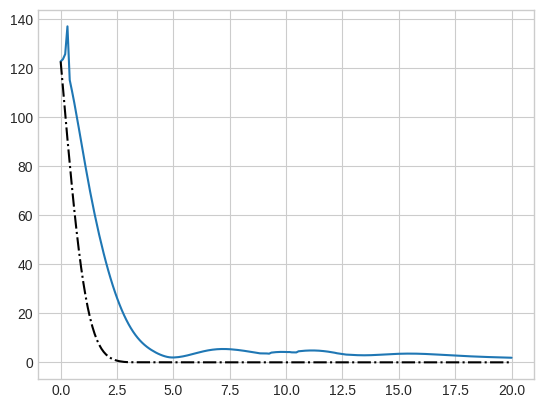

In [5]:
x_0 = np.array([3.1, 0, 0, 0])
T = 20
num_steps = 200
epochs = 20

plot_qp(eval_c)

In [6]:
controllers, gps = train_episodic(system, system_est, x_0, epochs, T, num_steps, info=True, func=eval_c, sgm=5, slack='linear')

ad_kernel
training time for ad_kernel_gp is: 0.006752218119800091
ad_rf
training time for ad_rf_gp is: 0.0005140560679137707
adp_kernel
training time for adp_kernel_gp is: 0.003569608088582754
adp_rf
training time for adp_rf_gp is: 0.00029139011166989803


  0%|                                          | 0/20 [00:00<?, ?it/s]

ad_kernel
training time for ad_kernel_gp is: 0.027413472067564726
ad_rf
training time for ad_rf_gp is: 0.001095850020647049
adp_kernel
training time for adp_kernel_gp is: 0.022365034092217684
adp_rf
training time for adp_rf_gp is: 0.0012783620040863752
iteration0:data size:398


  5%|█▋                               | 1/20 [01:42<32:34, 102.86s/it]

ad_kernel
training time for ad_kernel_gp is: 0.06664390699006617
ad_rf
training time for ad_rf_gp is: 0.0030166381038725376
adp_kernel
training time for adp_kernel_gp is: 0.0573539650067687
adp_rf
training time for adp_rf_gp is: 0.003341440111398697
iteration1:data size:597


 10%|███▎                             | 2/20 [03:25<30:53, 102.97s/it]

ad_kernel
training time for ad_kernel_gp is: 0.12506217299960554
ad_rf
training time for ad_rf_gp is: 0.0059545161202549934
adp_kernel
training time for adp_kernel_gp is: 0.11363531788811088
adp_rf
training time for adp_rf_gp is: 0.00641191890463233
iteration2:data size:796


 15%|████▉                            | 3/20 [05:09<29:12, 103.09s/it]

ad_kernel
training time for ad_kernel_gp is: 0.2192265831399709
ad_rf
training time for ad_rf_gp is: 0.008474483154714108
adp_kernel
training time for adp_kernel_gp is: 0.18863924103789032
adp_rf
training time for adp_rf_gp is: 0.01422576792538166
iteration3:data size:995


 20%|██████▌                          | 4/20 [06:52<27:31, 103.20s/it]

ad_kernel
training time for ad_kernel_gp is: 0.3282704020384699
ad_rf
training time for ad_rf_gp is: 0.014973270939663053
adp_kernel
training time for adp_kernel_gp is: 0.2960054299328476
adp_rf
training time for adp_rf_gp is: 0.017928289948031306
iteration4:data size:1194


 25%|████████▎                        | 5/20 [08:36<25:50, 103.34s/it]

ad_kernel
training time for ad_kernel_gp is: 0.4552288819104433
ad_rf
training time for ad_rf_gp is: 0.020126917865127325
adp_kernel
training time for adp_kernel_gp is: 0.4349914910271764
adp_rf
training time for adp_rf_gp is: 0.025635542115196586
iteration5:data size:1393


 30%|█████████▉                       | 6/20 [10:20<24:09, 103.53s/it]

ad_kernel
training time for ad_kernel_gp is: 0.6055417701136321
ad_rf
training time for ad_rf_gp is: 0.027981016086414456
adp_kernel
training time for adp_kernel_gp is: 0.5885124048218131
adp_rf
training time for adp_rf_gp is: 0.034788478165864944
iteration6:data size:1592


 35%|███████████▌                     | 7/20 [12:04<22:27, 103.69s/it]

ad_kernel
training time for ad_kernel_gp is: 0.8385014981031418
ad_rf
training time for ad_rf_gp is: 0.03534588706679642
adp_kernel
training time for adp_kernel_gp is: 0.8310577180236578
adp_rf
training time for adp_rf_gp is: 0.047359086107462645
iteration7:data size:1791


 40%|█████████████▏                   | 8/20 [13:48<20:47, 103.94s/it]

ad_kernel
training time for ad_kernel_gp is: 1.061687896028161
ad_rf
training time for ad_rf_gp is: 0.046403920045122504
adp_kernel
training time for adp_kernel_gp is: 1.0410755290649831
adp_rf
training time for adp_rf_gp is: 0.06928914599120617
iteration8:data size:1990


 45%|██████████████▊                  | 9/20 [15:33<19:06, 104.24s/it]

ad_kernel
training time for ad_kernel_gp is: 1.392338107805699
ad_rf
training time for ad_rf_gp is: 0.05681276088580489
adp_kernel
training time for adp_kernel_gp is: 1.3408932420425117
adp_rf
training time for adp_rf_gp is: 0.08045719400979578
iteration9:data size:2189


 50%|████████████████                | 10/20 [17:19<17:26, 104.67s/it]

ad_kernel
training time for ad_kernel_gp is: 1.7800304431002587
ad_rf
training time for ad_rf_gp is: 0.06885350518859923
adp_kernel
training time for adp_kernel_gp is: 1.6771088840905577
adp_rf
training time for adp_rf_gp is: 0.10291887610219419
iteration10:data size:2388


 55%|█████████████████▌              | 11/20 [19:04<15:45, 105.07s/it]

ad_kernel
training time for ad_kernel_gp is: 2.262269558152184
ad_rf
training time for ad_rf_gp is: 0.10344937001354992
adp_kernel
training time for adp_kernel_gp is: 2.109133763005957
adp_rf
training time for adp_rf_gp is: 0.1254920158535242
iteration11:data size:2587


 60%|███████████████████▏            | 12/20 [20:51<14:04, 105.59s/it]

ad_kernel
training time for ad_kernel_gp is: 2.7169311749748886
ad_rf
training time for ad_rf_gp is: 0.12820581998676062
adp_kernel
training time for adp_kernel_gp is: 2.5346032069064677
adp_rf
training time for adp_rf_gp is: 0.15450685122050345
iteration12:data size:2786


 65%|████████████████████▊           | 13/20 [22:39<12:24, 106.30s/it]

ad_kernel
training time for ad_kernel_gp is: 3.2701807878911495
ad_rf
training time for ad_rf_gp is: 0.14335056394338608
adp_kernel
training time for adp_kernel_gp is: 3.0632192220073193
adp_rf
training time for adp_rf_gp is: 0.1817379309795797
iteration13:data size:2985


 70%|██████████████████████▍         | 14/20 [24:28<10:42, 107.11s/it]

ad_kernel
training time for ad_kernel_gp is: 3.7546403540764004
ad_rf
training time for ad_rf_gp is: 0.16580645297653973
adp_kernel
training time for adp_kernel_gp is: 3.514370469842106
adp_rf
training time for adp_rf_gp is: 0.24328713095746934
iteration14:data size:3184


 75%|████████████████████████        | 15/20 [26:18<08:59, 107.96s/it]

ad_kernel
training time for ad_kernel_gp is: 4.499419975094497
ad_rf
training time for ad_rf_gp is: 0.21161785000003874
adp_kernel
training time for adp_kernel_gp is: 4.2392636919394135
adp_rf
training time for adp_rf_gp is: 0.2643416370265186
iteration15:data size:3383


 80%|█████████████████████████▌      | 16/20 [28:09<07:15, 108.99s/it]

ad_kernel
training time for ad_kernel_gp is: 5.148577623069286
ad_rf
training time for ad_rf_gp is: 0.22713347105309367
adp_kernel
training time for adp_kernel_gp is: 4.856787340017036
adp_rf
training time for adp_rf_gp is: 0.3102540650870651
iteration16:data size:3582


 85%|███████████████████████████▏    | 17/20 [30:03<05:30, 110.20s/it]

ad_kernel
training time for ad_kernel_gp is: 5.925398971885443
ad_rf
training time for ad_rf_gp is: 0.2866262730676681
adp_kernel
training time for adp_kernel_gp is: 5.593870065174997
adp_rf
training time for adp_rf_gp is: 0.35247066197916865
iteration17:data size:3781


 90%|████████████████████████████▊   | 18/20 [31:57<03:43, 111.57s/it]

ad_kernel
training time for ad_kernel_gp is: 6.647472020005807
ad_rf
training time for ad_rf_gp is: 0.31922372383996844
adp_kernel
training time for adp_kernel_gp is: 6.3414602719713
adp_rf
training time for adp_rf_gp is: 0.41792752291075885
iteration18:data size:3980


 95%|██████████████████████████████▍ | 19/20 [33:54<01:53, 113.02s/it]

ad_kernel
training time for ad_kernel_gp is: 7.702189757023007
ad_rf
training time for ad_rf_gp is: 0.3704803290311247
adp_kernel
training time for adp_kernel_gp is: 7.28390698088333
adp_rf
training time for adp_rf_gp is: 0.5029577249661088
iteration19:data size:4179


100%|████████████████████████████████| 20/20 [35:52<00:00, 107.63s/it]


In [7]:
data = np.load('data/_diff from oracle.npz')
print(data["gp_zs"].T)

[[305.7401709  305.74017007 305.74016966 305.74017123]
 [305.7401698  305.74016991 305.74017007 305.74016416]
 [305.74017061 305.74016657 305.74017026 305.74017114]
 [305.74017019 305.74017082 305.74017034 305.74017068]
 [305.7401704  305.7401716  305.74017105 305.74020481]
 [305.74017096 305.74017064 305.74016885 305.74017   ]
 [305.74017065 305.74017128 305.74017003 305.74016828]
 [305.74017052 305.74017011 305.74017045 305.74017022]
 [305.74019685 305.74017367 305.74016983 305.74017048]
 [305.74017062 305.7402044  305.74017051 305.74017024]
 [305.74016945 305.74017064 305.74017033 305.74017052]
 [305.74017109 305.74017185 305.74017124 305.74017347]
 [305.74017067 305.74017038 305.74017273 305.7401688 ]
 [305.7401706  305.74017037 305.74017092 305.74017084]
 [305.74017114 305.74016971 305.74016309 305.74017026]
 [305.74017499 305.74017067 305.74016994 305.74017139]
 [305.74016705 305.74017083 305.74017064 305.74017095]
 [305.74016992 305.74017136 305.74017014 305.74017413]
 [305.7401

In [ ]:
# slacks = ['linear', 'quadratic']
# sgms = [5,10,15,20,25,30]
# for sgm in sgms:
#     for slack in slacks:
#         controllers, gps = train_episodic(system, system_est, x_0, epochs, T, num_steps, info=True, func=eval_c, sgm=sgm, slack=slack)
#         data = np.load('data/_diff from oracle.npz')
#         print(f'sgm={sgm}, slack={slack},diff={data["gp_zs"].T[-1]}')

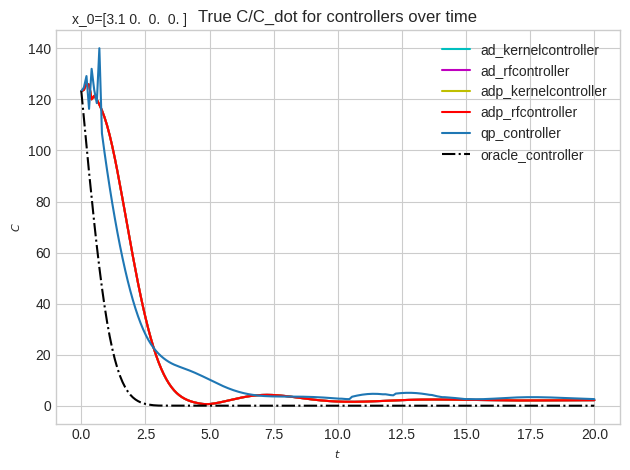

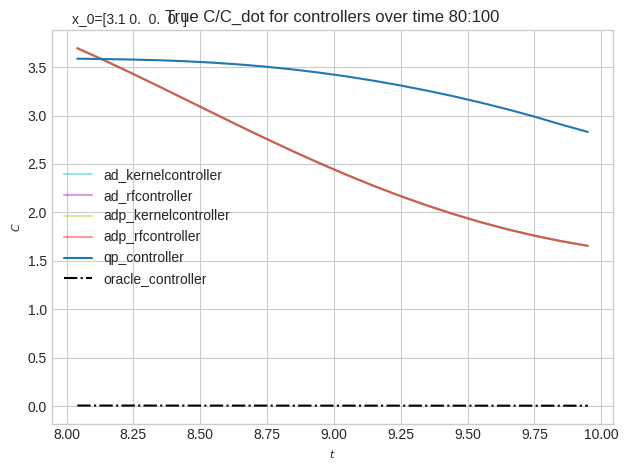

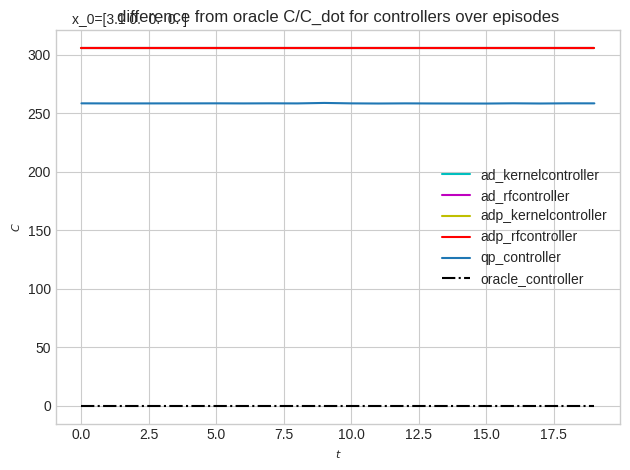

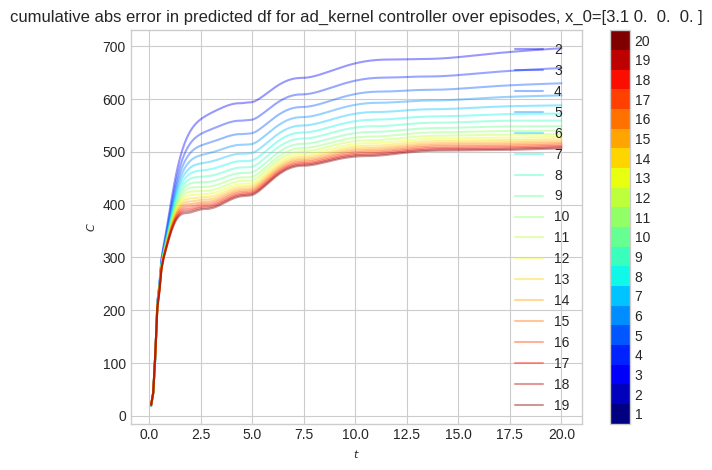

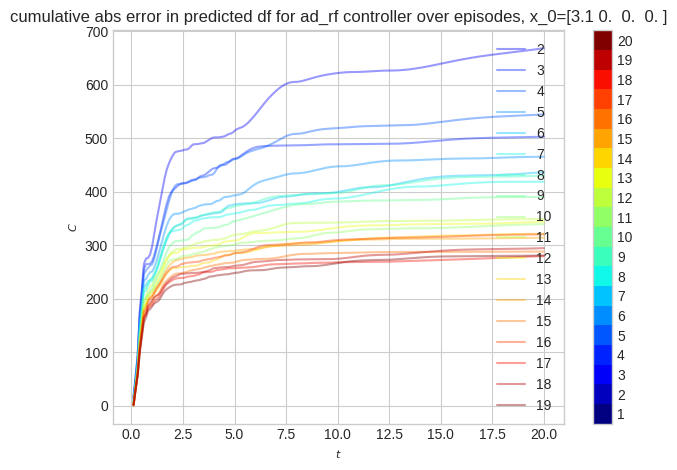

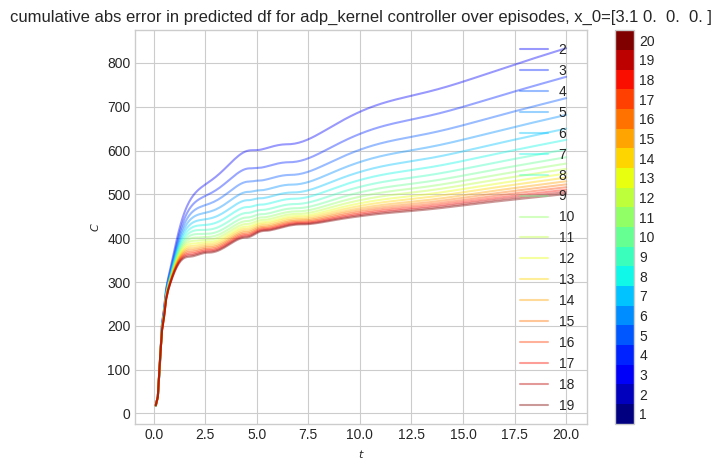

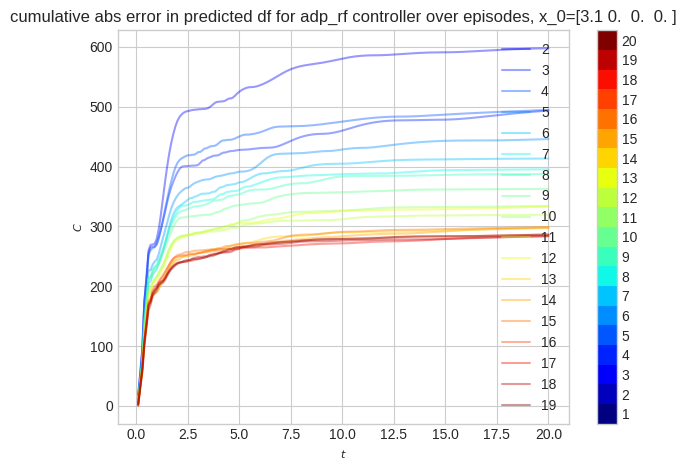

In [8]:
path = 'data/_eval_c.npz'
plot_info(x_0, controllers, path)
plot_info(x_0, controllers, 'data/_diff from oracle.npz', diff=True)
# plot_predicted_vs_true_func(x_0, epochs, T)
episodic_plot_cum_predicted_vs_true_func(x_0, epochs, T, num_steps)
gp_names = ['ad_kernel', 'ad_rf', 'adp_kernel', 'adp_rf']

In [ ]:
# create_grid_data(system, qp_controller, lyap, lyap_est, T, num_steps)
# episodic_plot_func_for_controller(x_0, 10, path, gp_names)

In [11]:
create_animation(system, controllers, gps, x_0)

NameError: name 'tqdm' is not defined